<a href="https://colab.research.google.com/github/meetAmarAtGithub/Reva_MachineLearning/blob/main/KMeans_IRIS_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [ ]:
%cd "/content/gdrive/My Drive/Colab Notebooks/Reva/4_MachineLearning"

/content/gdrive/My Drive/Colab Notebooks/Reva/4_MachineLearning


In [ ]:
from sklearn.datasets import load_iris
import pandas as pd
import numpy as np

In [ ]:
iris = load_iris()

In [ ]:
iris_dataframe = pd.DataFrame(data= np.c_[iris['data'], iris['target']],columns= iris['feature_names'] + ['target'])
iris_dataframe.head(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0.0
1,4.9,3.0,1.4,0.2,0.0
2,4.7,3.2,1.3,0.2,0.0
3,4.6,3.1,1.5,0.2,0.0
4,5.0,3.6,1.4,0.2,0.0


In [ ]:
#iris_pivot = pd.pivot_table(iris_dataframe, values = iris.feature_names, index = 'target', aggfunc=np.median)
#iris_pivot.head(5)

In [ ]:
#scale all values between 0 and 1
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
scld = MinMaxScaler(feature_range=(0,1))
arr_scld = scld.fit_transform(iris_dataframe)
iris_scld = pd.DataFrame(arr_scld, columns=iris_dataframe.columns)
iris_scld.head(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,0.222222,0.625000,0.067797,0.041667,0.0
1,0.166667,0.416667,0.067797,0.041667,0.0
2,0.111111,0.500000,0.050847,0.041667,0.0
3,0.083333,0.458333,0.084746,0.041667,0.0
4,0.194444,0.666667,0.067797,0.041667,0.0


In [ ]:
iris_scld.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,0.428704,0.440556,0.467458,0.458056,0.500000
std,0.230018,0.181611,0.299203,0.317599,0.409616
min,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.222222,0.333333,0.101695,0.083333,0.000000
50%,0.416667,0.416667,0.567797,0.500000,0.500000
75%,0.583333,0.541667,0.694915,0.708333,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
iris_scld.shape

(150, 5)

In [ ]:
iris_dataframe.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [ ]:
import sklearn
#let's build cluster
from sklearn.cluster import KMeans
num_of_clusters = range(1,7)
error = []

for num_clusters in num_of_clusters:
  clusters = KMeans(num_clusters)
  clusters.fit(iris_scld)
  error.append(clusters.inertia_/100)


df= pd.DataFrame({"Cluster_Numbers": num_of_clusters,"Errror_Term": error})
df.head(5)
  

,Cluster_Numbers,Errror_Term
0,1,0.661661
1,2,0.183778
2,3,0.078016
3,4,0.062847
4,5,0.050811


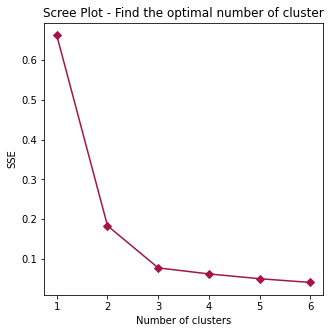

In [ ]:
from matplotlib import markers
#find out the number of clusters
import matplotlib.pyplot as plt
plt.figure(figsize=(5,5))
plt.plot(df.Cluster_Numbers, df.Errror_Term, marker = "D", color='#a51347')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.title('Scree Plot - Find the optimal number of cluster')
plt.show()

In [ ]:
#Build with 3 cluster
clusters = KMeans(3)
clusters.fit(iris_scld)
print()
clusters.inertia_

7.801559361268047

In [ ]:
clusters.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [ ]:
iris_dataframe['Cluster'] = clusters.labels_
clusters.labels_

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int32)

In [ ]:
iris_dataframe.tail(5)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,Cluster
145,6.7,3.0,5.2,2.3,2.0,1
146,6.3,2.5,5.0,1.9,2.0,1
147,6.5,3.0,5.2,2.0,2.0,1
148,6.2,3.4,5.4,2.3,2.0,1
149,5.9,3.0,5.1,1.8,2.0,1


In [ ]:
iris_dataframe.shape

(150, 6)

In [ ]:
iris_dataframe.to_csv('iris_cluster.csv')